In [1]:
import scvelo as scv
import cellrank as cr
import scanpy as sc
import anndata as ad
import magic
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATA_DIR="../../data/pancreas/"

In [2]:
adata = cr.datasets.pancreas()
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes = 2000)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
scv.tl.recover_dynamics(adata, n_jobs = 32)
scv.tl.velocity(adata, mode = "dynamical")
scv.tl.velocity_graph(adata)

Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 32/32 cores)


  0%|          | 0/1078 [00:00<?, ?gene/s]

/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:18) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/2531 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


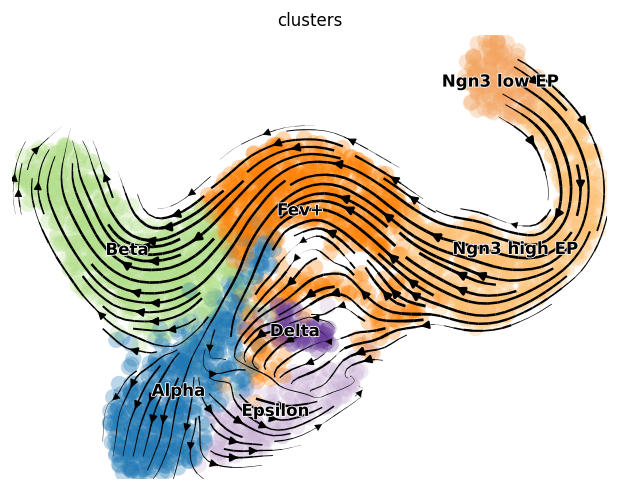

In [3]:
scv.pl.velocity_embedding_stream(adata, basis='umap', dpi = 120)

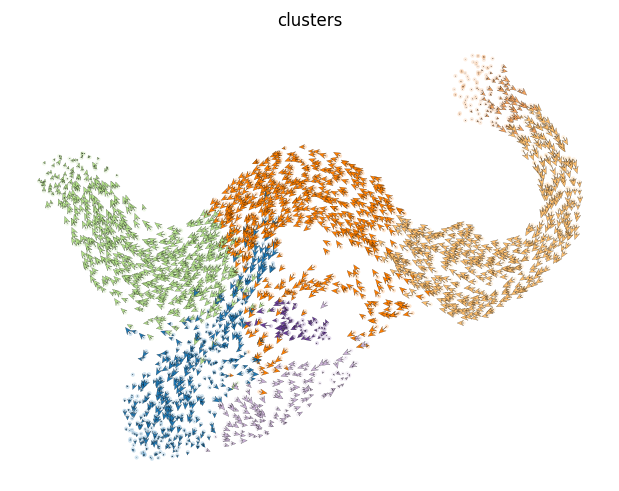

In [4]:
scv.pl.velocity_embedding(adata, arrow_length=3, arrow_size=2, dpi=120)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


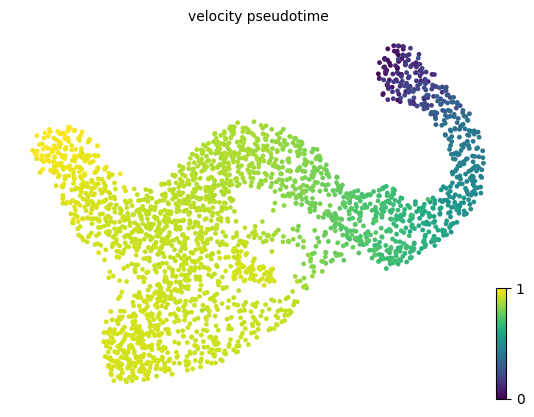

In [5]:
# Compute pseudotime(s)
scv.tl.latent_time(adata)
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', color_map='viridis')

In [6]:
# Gene names
genes = [x.upper() for x in list(adata.var.index)]
print('Total:', len(genes), 'genes')
# load TF list and interactions
tf_genes = pd.read_csv(DATA_DIR + "tf.txt", header = None)
A = pd.read_csv(DATA_DIR + "A.txt", sep = " ", header = None)
tf_index = np.isin(adata.var.index.str.upper(), tf_genes.iloc[:, 0].to_numpy())

Total: 2000 genes


/tmp/ipykernel_58589/1515528141.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0.2)
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


  0%|          | 0/2531 [00:00<?, ?cell/s]

  0%|          | 0/2531 [00:00<?, ?cell/s]

/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


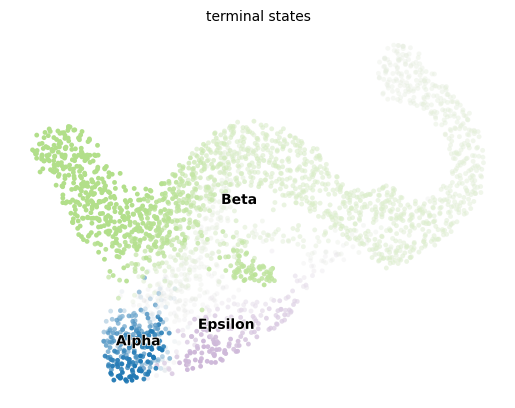

In [7]:
cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0.2)
cr.pl.terminal_states(adata)

/tmp/ipykernel_58589/1187097337.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata, cluster_key="clusters")
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


  0%|          | 0/2531 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/2531 [00:00<?, ?cell/s]

------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0
[unset]: write_line error; fd=-1 buf=:cmd=abort exitcode=59
:
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


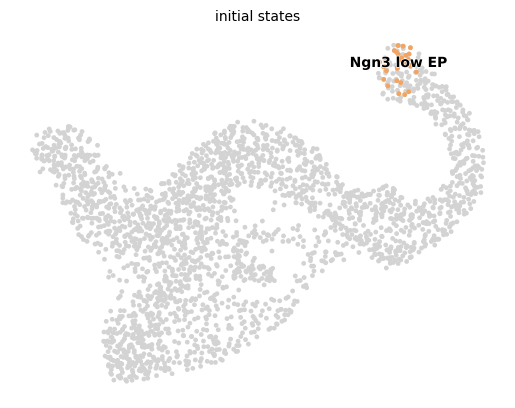

In [8]:
cr.tl.initial_states(adata, cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

In [9]:
# k = cr.tl.transition_matrix(
#     adata, weight_connectivities=0.1, show_progress_bar=True, scheme = "cosine",
# )
# use instead the following call
k = cr.tl.kernels.VelocityKernel(adata, scheme = 'cosine').compute_transition_matrix(softmax_scale = None)

  0%|          | 0/2531 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: Process SyncManager-39:
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
[0]PETSC ERROR: Run

  0%|          | 0/2531 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0
[unset]: write_line error; fd=-1 buf=:cmd=abort exitcode=59
:
system msg for write_line failure : Bad file descriptor


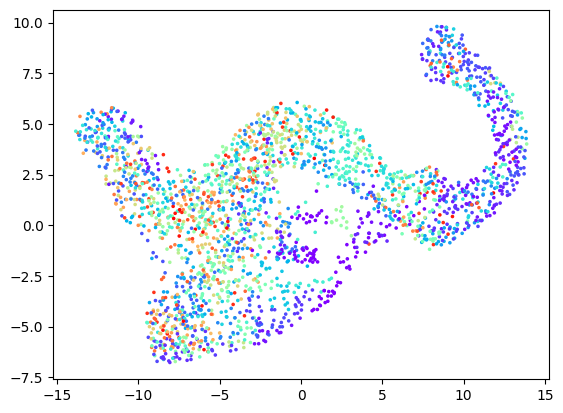

In [10]:
# compute "metacell" clusters (ended up not using Leiden in the paper example)
sc.tl.leiden(adata, resolution = 50)
adata.obs.leiden = list(map(int, adata.obs.leiden.to_numpy()))
plt.scatter(adata.obsm["X_umap"][:, 0], adata.obsm["X_umap"][:, 1], c = list(map(int, adata.obs.leiden.to_numpy())), cmap = "rainbow", s = 2.5)

In [11]:
G_sp = adata.uns['neighbors']['distances']
adata.obsm["C"] = sp.sparse.csgraph.floyd_warshall(G_sp, directed = False)**2

In [12]:
# write input data for locaTE
P = k.transition_matrix;
np.save(DATA_DIR + "P.npy", P.todense())
np.save(DATA_DIR + "C.npy", adata.obsm["C"])
np.save(DATA_DIR + "X.npy", adata.X[:, tf_index].todense())
np.save(DATA_DIR + "X_pca.npy", adata.obsm["X_pca"])
np.save(DATA_DIR + "X_umap.npy", adata.obsm["X_umap"])
np.save(DATA_DIR + "dpt.npy", adata.obs.latent_time)
np.save(DATA_DIR + "leiden.npy", adata.obs.leiden)

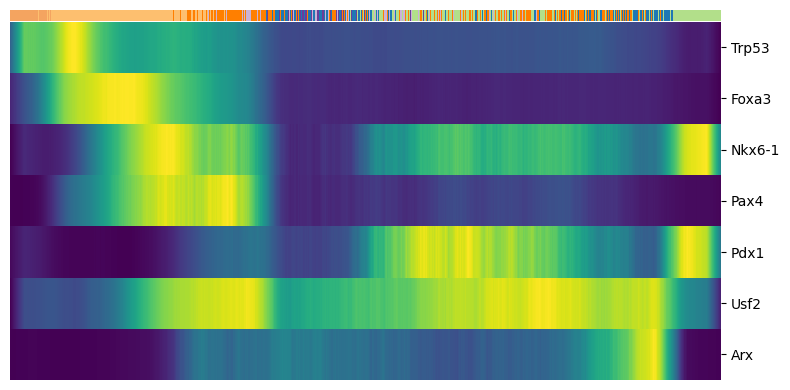

In [13]:
adata_subset = adata[:, tf_index]
# top_genes = adata_subset.var['fit_likelihood'].sort_values(ascending=False).index
top_genes = ["Pdx1", "Arx", "Nkx6-1", "Foxa3", "Pax4", "Usf2", "Trp53"]
scv.pl.heatmap(adata_subset, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


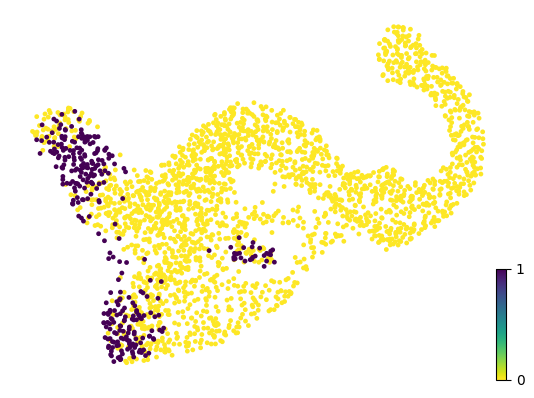

In [14]:
# Stationary OT
import statot
# C = sp.spatial.distance.cdist(adata.obsm["X_pca"], adata.obsm["X_pca"]);
C = adata.obsm["C"]
sink_idx = (adata.obs.velocity_pseudotime >= np.quantile(adata.obs.velocity_pseudotime, 0.85)) &  \
            (adata.obs.velocity_pseudotime < np.quantile(adata.obs.velocity_pseudotime, 0.975))
R = np.zeros(adata.shape[0])
R[sink_idx] = -50/sum(sink_idx)
R[~sink_idx] = -R.sum()/sum(~sink_idx)
scv.pl.scatter(adata, color=sink_idx)

In [15]:
gamma, mu, nu = statot.inference.statot(adata.obsm["X_pca"], g = np.exp(R), dt = 1, C = C, eps = 1.0*C.mean(), method = "quad")
adata.obsm["P_statot"] = statot.inference.row_normalise(gamma)
np.save(DATA_DIR + "P_statot.npy", adata.obsm["P_statot"])

In [16]:
# calculate neighbourhood kernel using QOT
import ot
R = ot.smooth.smooth_ot_dual(np.ones(adata.shape[0]), np.ones(adata.shape[0]), C, 2.5*C.mean())
adata.obsm["R"] = R
np.save(DATA_DIR + "R.npy", adata.obsm["R"])

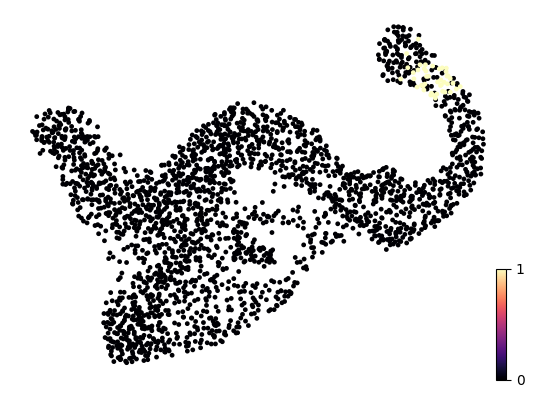

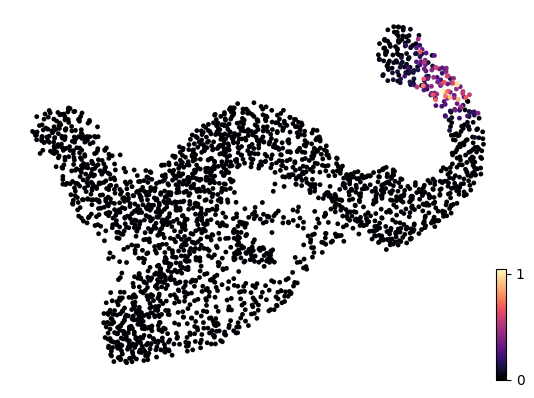

In [17]:
pi0 = np.array((adata.obs.velocity_pseudotime < 0.3) & (adata.obs.velocity_pseudotime > 0.2))
pi1 = np.linalg.matrix_power(P.todense(), 1).T @ pi0
scv.pl.scatter(adata, color=pi0, color_map='magma')
scv.pl.scatter(adata, color=pi1, color_map='magma')

In [18]:
A_index = list(map(lambda x: np.where(x == tf_genes.iloc[:, 0])[0][0], adata.var.index[tf_index].str.upper()))
A_subset = A.iloc[A_index, :].iloc[:, A_index]
pd.DataFrame(adata.var.index[tf_index]).to_csv(DATA_DIR + "genes.txt", index = None)
np.save(DATA_DIR + "J.npy", A_subset.to_numpy())
pd.DataFrame(A_subset.to_numpy()).to_csv(DATA_DIR + "J.csv", header = False, index = False)

saving figure to file ./figures/scvelo_pancreas_cluster_streamplot.svg


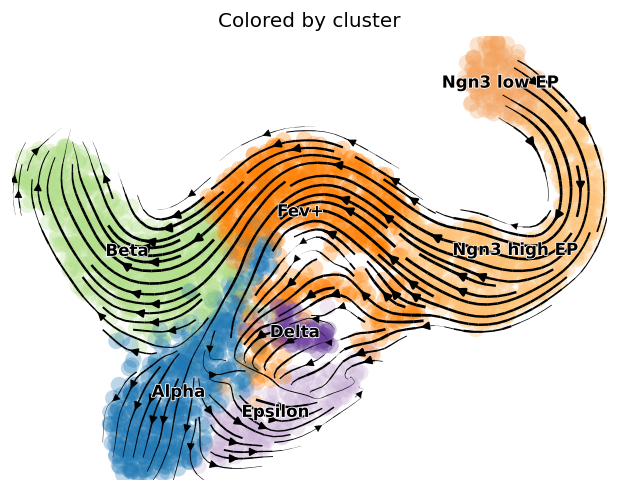

In [19]:
scv.pl.velocity_embedding_stream(adata, basis='umap', title = "Colored by cluster", 
                                 save = "pancreas_cluster_streamplot.svg", fontsize = 12, dpi = 120)

/tmp/ipykernel_58589/1171176666.py:2: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(adata, backward = False)


  0%|          | 0/3 [00:00<?, ?/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0
[unset]: write_line error; fd=-1 buf=:cmd=abort exitcode=59
:
system msg for write_line failure : Bad file descriptor
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/data/gpfs/projects/punim0638/stephenz/envs/py39/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: 

saving figure to file ./figures/scvelo_pancreas_fateplot.pdf


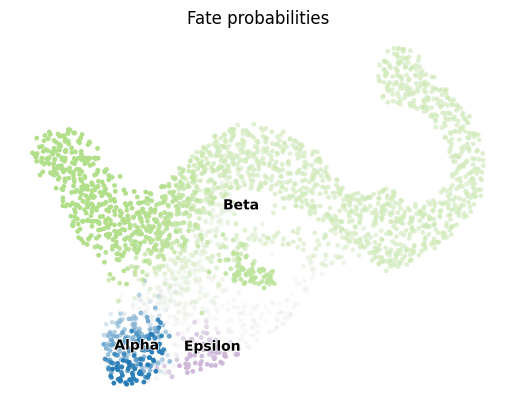

In [20]:
# fate probs
cr.tl.lineages(adata, backward = False)
cr.pl.lineages(adata, same_plot= True, save = "pancreas_fateplot.pdf", title = "Fate probabilities", fontsize = 12)
pd.DataFrame(adata.obsm["to_terminal_states"], columns = adata.obsm["to_terminal_states"].names, index = adata.obs.index).to_csv(DATA_DIR + "fates.csv")
pd.DataFrame(adata.obs.clusters).to_csv(DATA_DIR + "clusters.csv")

In [ ]:
# run locaTE
!julia ../../tools/locaTE.jl/src/locaTE_cmd.jl --lambda1 10.0 --lambda2 0.001 --k_lap 25 --suffix locate --gpu $DATA_DIR/X.npy $DATA_DIR/X_pca.npy $DATA_DIR/P.npy $DATA_DIR/R.npy

In [ ]:
!julia ../../tools/locaTE.jl/src/locaTE_cmd.jl --lambda1 10.0 --lambda2 0.001 --k_lap 25 --suffix locate_statot --gpu $DATA_DIR/X.npy $DATA_DIR/X_pca.npy $DATA_DIR/P_statot.npy $DATA_DIR/R.npy

In [23]:
import sklearn as sk
from sklearn import manifold
G_pca = sk.decomposition.PCA().fit_transform(np.load("G_locate.npy"))
G_spec = sk.manifold.SpectralEmbedding().fit_transform(G_pca)

saving figure to file ./figures/scvelo_pancreas_streamplot.svg


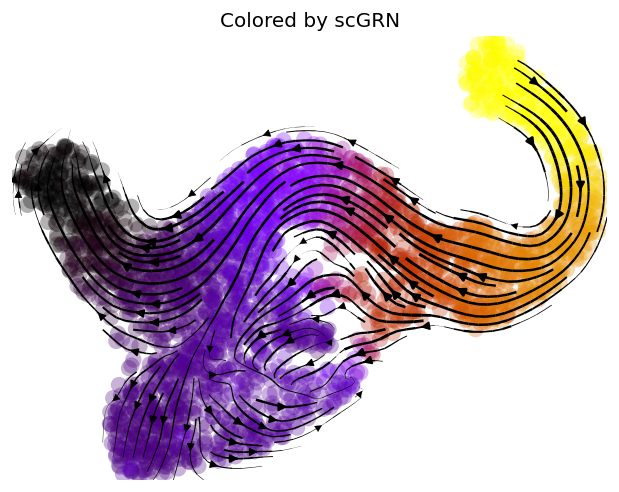

In [24]:
adata.obs["grn_pca1"] = np.array(G_pca[:, 0])
adata.obs["grn_spec1"] = np.array(G_spec[:, 0])
scv.pl.velocity_embedding_stream(adata, basis='umap', color = "grn_spec1", cmap = "gnuplot", title = "Colored by scGRN", colorbar = False, 
                                 save = "pancreas_streamplot.svg", fontsize = 12, dpi = 120)